11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/11
422/422 [==============================] - 64s 147ms/step - loss: 0.4669 - accuracy: 0.8814 - val_loss: 0.1150 - val_accuracy: 0.9658
Epoch 2/11
422/422 [==============================] - 59s 140ms/step - loss: 0.0998 - accuracy: 0.9701 - val_loss: 0.0878 - val_accuracy: 0.9757
Epoch 3/11
422/422 [==============================] - 59s 139ms/step - loss: 0.0687 - accuracy: 0.9783 - val_loss: 0.0851 - val_accuracy: 0.9740
Epoch 4/11
422/422 [==============================] - 59s 139ms/step - loss: 0.0510 - accuracy: 0.9837 - val_loss: 0.0580 - val_accuracy: 0.9835
Epoch 5/11
422/422 [==============================] - 59s 141ms/step - loss: 0.0435 - accuracy: 0.9864 - val_loss: 0.0577 - val_accuracy: 0.9843
Epoch 6/11
422/422 [==============================] - 56s 133ms/step - loss: 0.0353 - accuracy: 0.9890 - val_loss: 0.0532 - val_accuracy: 0.9852
Epoch 7/11
422/422 [==============================] - 63s 148ms/s

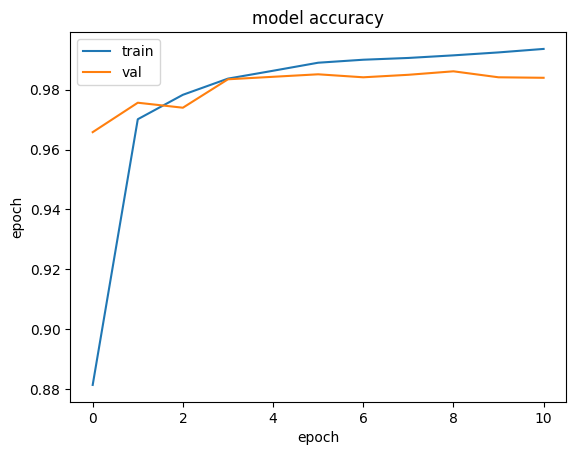

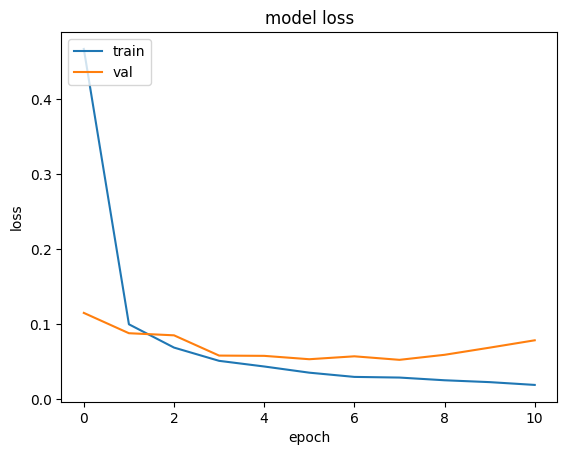

313/313 [==============================] - 4s 13ms/step - loss: 0.0923 - accuracy: 0.9796
0.09231751412153244
0.9796000123023987
1/1 [==============================] - 0s 234ms/step


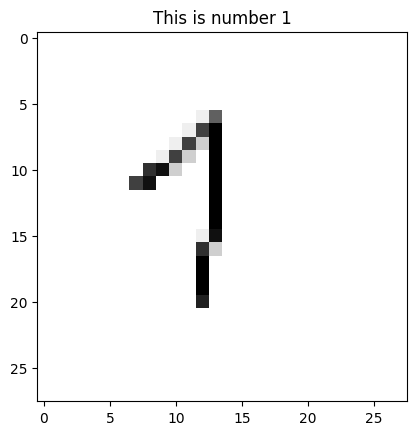

1/1 [==============================] - 0s 39ms/step


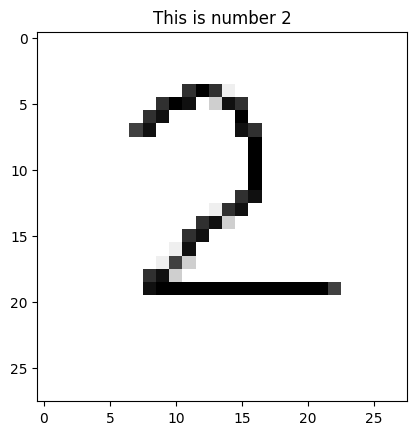

1/1 [==============================] - 0s 23ms/step


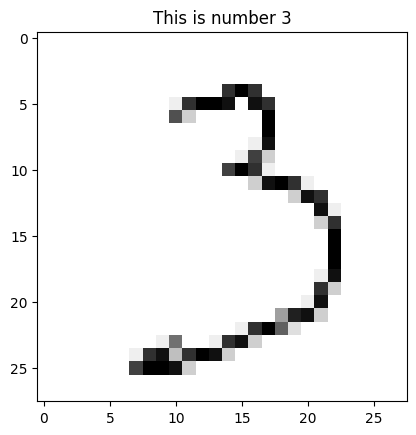

1/1 [==============================] - 0s 25ms/step


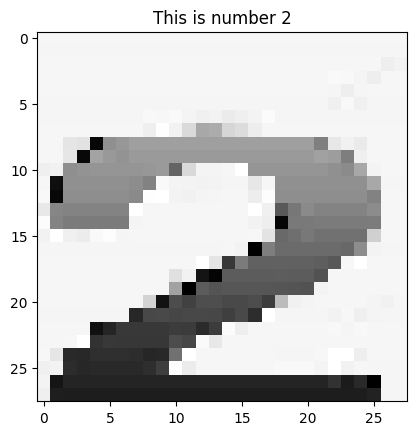

In [1]:
# Import necessary model
import cv2
import numpy as np
import matplotlib.pylab as plt
import keras
import tensorflow as tf
import os

# Load data
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# Construct model CNN
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(28,28,1)))
# add first hidden layer
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
# add second hidden layer
model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
# add third hidden layer
model.add(tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
# Add fully connected layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=32,activation="relu"))
model.add(tf.keras.layers.Dense(units=64,activation="relu"))
#model.add(tf.keras.layers.Dense(units=128,activation="relu"))
model.add(tf.keras.layers.Dense(units=10,activation="softmax"))
# Compiling and optimizing model
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
# Training model
model_fit = model.fit(x_train,y_train,batch_size=128,epochs=11,validation_split=0.1,verbose=1)


plt.plot(model_fit.history["accuracy"])
plt.plot(model_fit.history["val_accuracy"])
plt.title("model accuracy")
plt.xlabel("epoch")
plt.ylabel("epoch")
plt.legend(["train","val"],loc="upper left")
plt.show()

plt.plot(model_fit.history["loss"])
plt.plot(model_fit.history["val_loss"])
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train","val"],loc="upper left")
plt.show()

# Save model
model.save("main_model.model")

# Load model
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/Model_recoginize_digit/main_model.model")

loss,accuracy = model.evaluate(x_test,y_test)
print(loss)
print(accuracy)
# Recognize image
number = 1
while os.path.isfile(f"/content/drive/MyDrive/Colab Notebooks/Model_recoginize_digit/test/d{number}.png"):
  try:
    img = cv2.imread(f"/content/drive/MyDrive/Colab Notebooks/Model_recoginize_digit/test/d{number}.png")[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    plt.title(f"This is number {np.argmax(prediction)}")
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.show()
    number+=1
  except:
    print("Don't find any image")
    number+=1